In [401]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

RNG = np.random.default_rng(12345)

In [402]:
period = 50.0
ts = np.sort(RNG.integers(-100, 100, size=(1000,)))

# generate features as Fourier series
num_sins = 10
amplitudes = RNG.integers(low=1, high=10, size = (1, num_sins))
x = np.zeros(shape=(num_sins, len(ts)))
for k in range(1,num_sins+1):
    x[k-1] = (-1)**k * np.sin(2 * np.pi * k * ts / period) / k + (RNG.uniform(-0.5, 0.5, size=ts.shape))
x = x.T * amplitudes

# generate sawtooth wave as target
y = 1*2*(ts/period - np.floor(0.5 + ts/period)) + (RNG.uniform(-0.05, 0.05, size=ts.shape))

oos_ts = np.sort(RNG.integers(100, 150, size=(len(ts)//50,)))
x_test = np.zeros(shape=(num_sins, len(oos_ts)))
for k in range(1,num_sins+1):
    x_test[k-1] = (-1)**k * np.sin(2 * np.pi * k * oos_ts / period) / k + (RNG.uniform(-0.5, 0.5, size=oos_ts.shape))
x_test = x_test.T * amplitudes

In [403]:
def ols_fit(x, y, const=True):
    if const: x = np.concat((np.ones((x.shape[0], 1)), x), axis = 1)

    betas = np.linalg.inv(x.T @ x) @ x.T @ y

    if const:
        return betas[0], betas[1:], x @ betas
    else:
        return betas, x @ betas

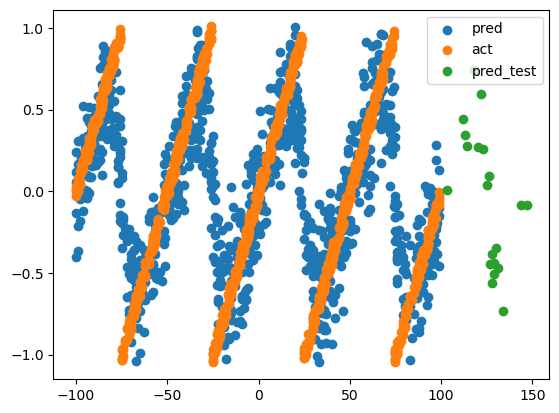

In [417]:
b0, betas, in_sample_preds = ols_fit(x, y)
out_sample_preds = b0 + x_test @ betas

plt.scatter(ts, in_sample_preds, label = 'pred')
plt.scatter(ts, y, label = 'act')
plt.scatter(oos_ts, out_sample_preds, label = 'pred_test')
plt.legend()
plt.show()

In [418]:
def loss(actual, pred):
    return 0.5 * np.sum((actual - pred)**2)

def sigma(x):
    return 1 / (1 + np.exp(-x))

def sigma_prime(x):
    return sigma(x) * (1 - sigma(x))

In [419]:
layer_neurons = {
    0: 10,
    1: 3,
    2: 2,
    3: 1
}

In [428]:
weights1 = RNG.uniform(low = -1, high = 1, size = (layer_neurons[1],layer_neurons[0]))
weights2 = RNG.uniform(low = -1, high = 1, size = (layer_neurons[2],layer_neurons[1]))
weights3 = RNG.uniform(low = -1, high = 1, size = (layer_neurons[3],layer_neurons[2]))

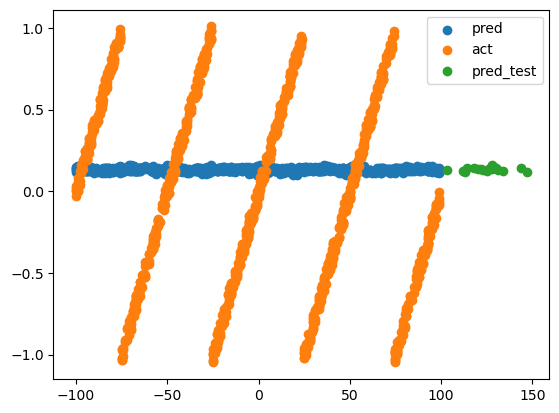

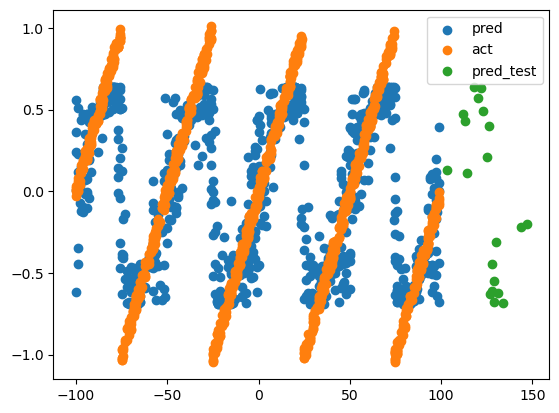

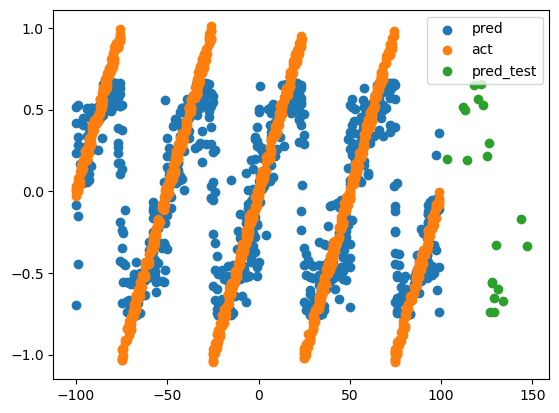

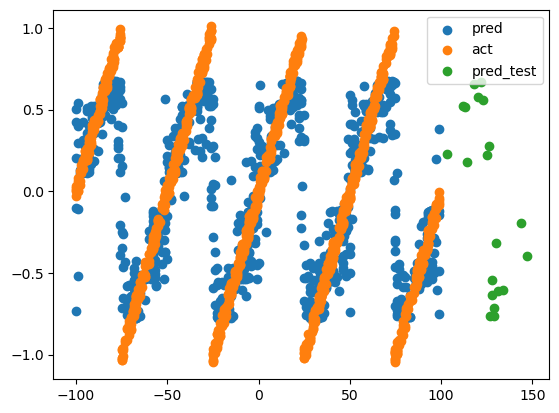

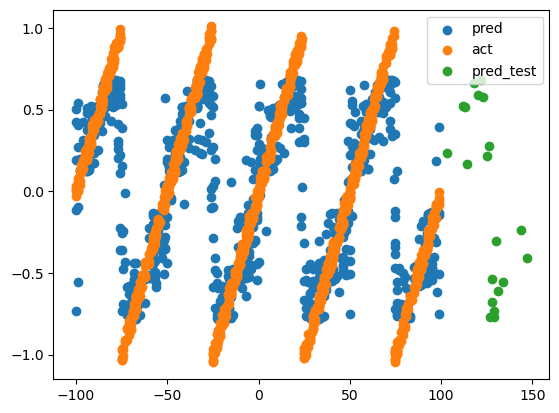

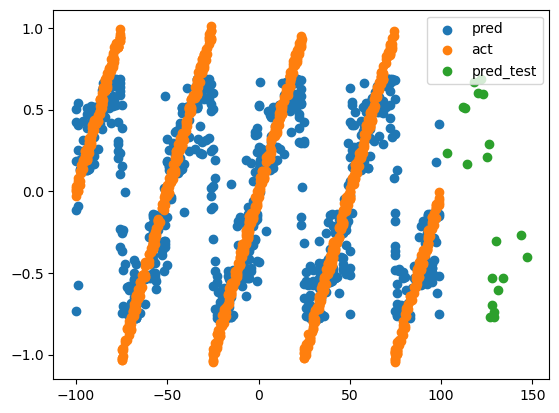

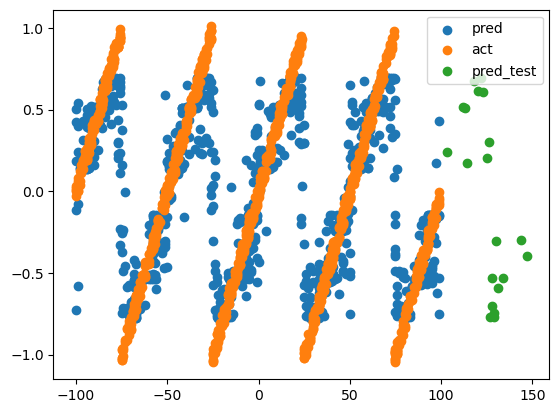

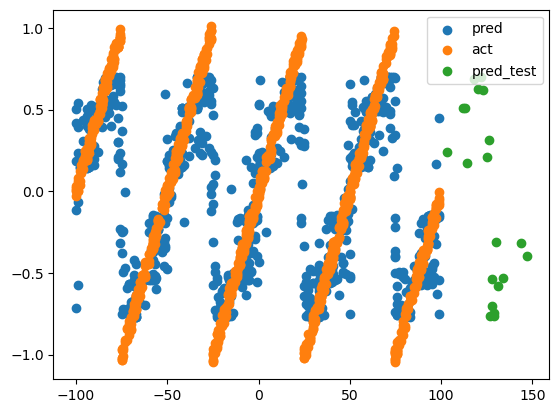

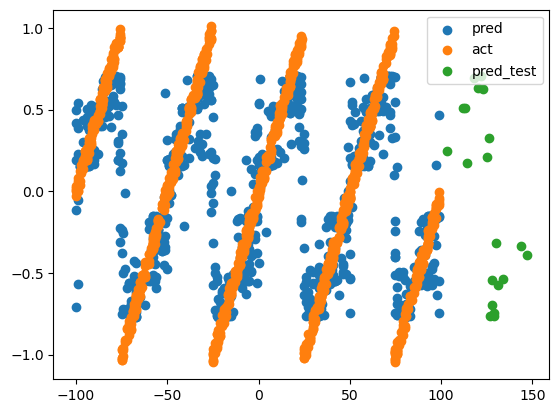

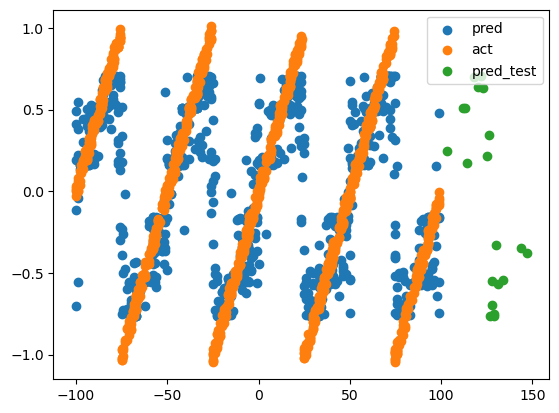

In [ ]:
for i in range(10000):
    # forward pass

    # apply layer1
    # intermediate value z
    z1 = weights1 @ x.T
    a1 = sigma(z1)

    # apply layer2
    z2 = weights2 @ a1
    a2 = sigma(z2)

    # apply layer3
    z3 = weights3 @ a2
    a3 = z3

    if i % 1000 == 0:
        oos_a3 = weights3 @ sigma(weights2 @ sigma(weights1 @ x_test.T))

        plt.scatter(ts, a3, label='pred')
        plt.scatter(ts, y, label='act')
        plt.scatter(oos_ts, oos_a3, label='pred_test')
        plt.legend()
        plt.show()

    # backpropagation

    # calculate gradient
    d3 = (a3 - y)
    grad_weights3 = d3 @ (a2.T / a2.shape[1])

    d2 = a2*(1-a2) * (weights3.T @ d3)
    grad_weights2 = d2 @ (a1.T / a2.shape[1])

    d1 = a1*(1-a1) * (weights2.T @ d2)
    grad_weights1 = d1 @ (x / x.shape[0])

    weights1 -= 0.4*grad_weights1
    weights2 -= 0.4*grad_weights2
    weights3 -= 0.4*grad_weights3

In [ ]:
def forward_pass(x, y, layers = {}, weights = None, activation_function = sigma):
    


def backprop(y, activations, weights, activation_function = sigma):
    layers = len(weights)

    # derivative of least squares loss
    deltas = [(activations[-1] - y)*()]

In [18]:
xtest = np.array([[1,1,2], [1,3,4], [1,5,6], [1,7,8]])
wtest = np.array([[2,2,3], [1,2,0]])